In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('AppleStore.csv')
print(df.shape)

(7197, 17)


In [5]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df=df.dropna()

In [11]:
df1 = df.groupby('prime_genre')[['user_rating']].mean().sort_values('user_rating', ascending=False).head(10)

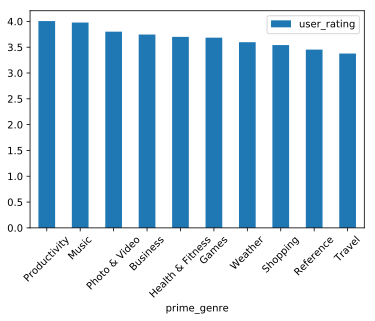

In [13]:
#График показывает распределение средней оценки приложений в зависимости от категории приложений, для того
#чтобы понять какие категории приложений пользователи оценивают выше
df1.plot(kind = 'bar', rot=45)

In [14]:
import seaborn as sns

In [15]:
%config InlineBackend.figure_format = 'png' 

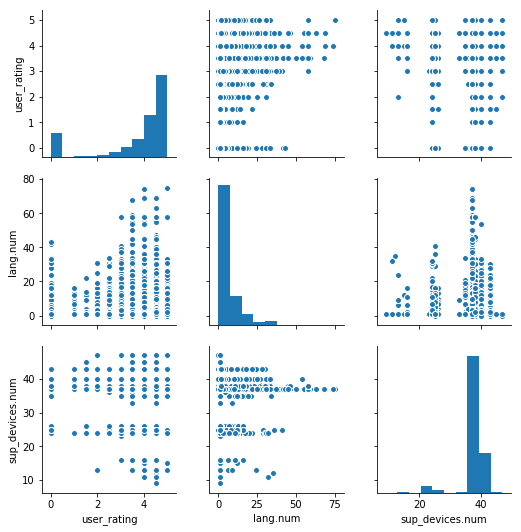

In [17]:
# График зависисмости средней оценки от количества поддерживаемых языков и девайсов 
sns.pairplot(df[['user_rating','lang.num','sup_devices.num']])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


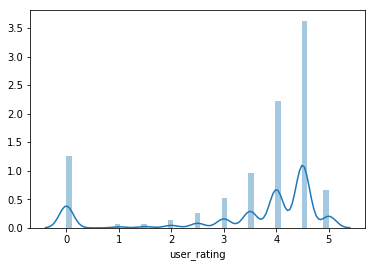

In [18]:
#Распределение средней оценки пользователей прилжений
sns.distplot(df.user_rating);

In [31]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [29]:
df2 = df.groupby('prime_genre')[['size_bytes']].mean().sort_values('size_bytes', ascending=False).head(10)
df2.head()

,size_bytes
prime_genre,
Medical,3.763890e+08
Games,2.836583e+08
Education,1.804242e+08
Book,1.788206e+08
Reference,1.551627e+08


In [33]:
# Распределение весов приложений в зависимости от категории
trace0 = go.Bar(
    x=df2.index,
    y=df2.size_bytes,
)
data = [trace0]
layout = {'title': 'Average weight'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [34]:
df.prime_genre.unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [35]:
#Box plot категорий приложений и их средних оценок
data = []

for genre in df.prime_genre.unique():
    data.append(
        go.Box(y=df[df.prime_genre==genre].user_rating, 
               name=genre)
    )
iplot(data, show_link = False)